In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from datetime import datetime

# Download CSV file

In [2]:
df = pd.read_csv('coursework_other.csv', encoding = 'unicode_escape', parse_dates=['Date'], dayfirst=True, index_col=['Date'])
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
df["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

<BarContainer object of 8760 artists>

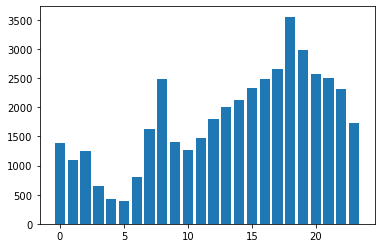

In [4]:
plt.bar(height=df["Rented Bike Count"], x=df.Hour)

In [5]:
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['DayOfWeek']=df.index.dayofweek
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,DayOfWeek
Date,,,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4


In [6]:
df = df.reset_index()
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,DayOfWeek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4


Print the shape of Dataframe  and Check for Null Values

In [7]:
print("Dataframe Shape:", df.shape)
print("Any NaN Values Present?", df.isnull().values.any())

Dataframe Shape: (8760, 18)
Any NaN Values Present? False


# Data Processing

## Set target variable, Y, as the Daily Rented Bike Count


In [8]:
#Set Target Variable
Y = pd.DataFrame(df["Rented Bike Count"])
Y

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
8755,1003
8756,764
8757,694
8758,712


## Set features, X

In [9]:
#Selecting the Features
X = pd.DataFrame(df.drop(columns=["Date","Rented Bike Count"]))

# print(X.shape)
print('The shape of Y is: ', Y.shape)
print('The shape of X is: ', X.shape)
print('The 17 features are: ', X.columns)

X

The shape of Y is:  (8760, 1)
The shape of X is:  (8760, 16)
The 17 features are:  Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'DayOfWeek'],
      dtype='object')


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,DayOfWeek
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4


In [10]:
from sklearn.preprocessing import OneHotEncoder

categorical = X[["Seasons","Holiday","Functioning Day","DayOfWeek"]]

ohe = OneHotEncoder(drop='if_binary', sparse=False)
ohe.fit(categorical)
ohe.get_feature_names()

array(['x0_Autumn', 'x0_Spring', 'x0_Summer', 'x0_Winter',
       'x1_No Holiday', 'x2_Yes', 'x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4',
       'x3_5', 'x3_6'], dtype=object)

In [11]:
ohe.get_params()

{'categories': 'auto',
 'drop': 'if_binary',
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': False}

In [12]:
ohe.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6])]

In [13]:
categorical_encoded = ohe.transform(categorical)
categorical_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [14]:
cat_columns = ['Season_Autumn','Season_Spring','Season_Summer','Season_Winter','Holiday_Yes','Functioning_Day_Yes','DayOfWeek_Sun','DayOfWeek_Mon','DayOfWeek_Tue','DayOfWeek_Wed','DayOfWeek_Thu','DayOfWeek_Fri','DayOfWeek_Sat']
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=cat_columns)
categorical_encoded_df

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Yes,Functioning_Day_Yes,DayOfWeek_Sun,DayOfWeek_Mon,DayOfWeek_Tue,DayOfWeek_Wed,DayOfWeek_Thu,DayOfWeek_Fri,DayOfWeek_Sat
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8756,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8757,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8758,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
X = pd.DataFrame(pd.concat([X,categorical_encoded_df], axis=1))
X


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Season_Winter,Holiday_Yes,Functioning_Day_Yes,DayOfWeek_Sun,DayOfWeek_Mon,DayOfWeek_Tue,DayOfWeek_Wed,DayOfWeek_Thu,DayOfWeek_Fri,DayOfWeek_Sat
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
X = X.drop(columns=['Seasons','Functioning Day','DayOfWeek','Holiday'])
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,...,Season_Winter,Holiday_Yes,Functioning_Day_Yes,DayOfWeek_Sun,DayOfWeek_Mon,DayOfWeek_Tue,DayOfWeek_Wed,DayOfWeek_Thu,DayOfWeek_Fri,DayOfWeek_Sat
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,30,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,30,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,30,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,30,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
features = X.columns
print(features)
print(X.dtypes)

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Holiday_Yes', 'Functioning_Day_Yes', 'DayOfWeek_Sun',
       'DayOfWeek_Mon', 'DayOfWeek_Tue', 'DayOfWeek_Wed', 'DayOfWeek_Thu',
       'DayOfWeek_Fri', 'DayOfWeek_Sat'],
      dtype='object')
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Day                            int64
Month                          int64
Year                           int64
Season_Autumn                float64
Season_Spring              

## Normalise Input features

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_rescaled = sc.fit_transform(X)

# Split into a train and test set

In [19]:
from sklearn.model_selection import train_test_split

Y = np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X_rescaled,Y, test_size=0.2, shuffle=False ,random_state=42)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X,Y, test_size=0.2, shuffle=False ,random_state=42)

print("The size of the train set is:", X_train.size, " and the size of the test set is:", X_test.size)
print("The ratio is", round(X_train.size/(X_test.size+X_train.size), 4))

The size of the train set is: 175200  and the size of the test set is: 43800
The ratio is 0.8


# Baseline model performance
### Using dummy variable from sklearn

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
from sklearn.dummy import DummyRegressor

In [51]:
dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
y_predict_dummy_mean = dummy_mean.predict(X_test)
y_predict_dummy_median = dummy_median.predict(X_test)

print("Root mean squared error (dummy mean): {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_predict_dummy_mean))))
print("Mean absolute error (dummy mean): {:.3f}".format(mean_absolute_error(y_test, y_predict_dummy_mean)))
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))

print("\nRoot mean squared error (dummy median): {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_predict_dummy_median))))
print("Mean absolute error (dummy median): {:.3f}".format(mean_absolute_error(y_test, y_predict_dummy_median)))
print("r2_score (dummy median): {:.3f}".format(r2_score(y_test, y_predict_dummy_median)))

Root mean squared error (dummy mean): 616.819
Mean absolute error (dummy mean): 500.999
r2_score (dummy mean): -0.01

Root mean squared error (dummy median): 686.323
Mean absolute error (dummy median): 537.263
r2_score (dummy median): -0.252


<BarContainer object of 8760 artists>

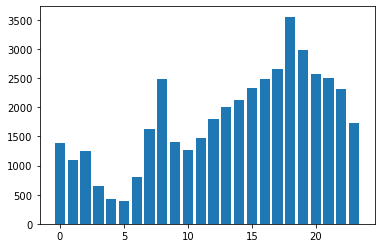

In [22]:
plt.bar(height=df["Rented Bike Count"], x=df.Hour)

In [45]:
dummy = df.groupby("Hour").mean()["Rented Bike Count"]

dummy_test = X_test_raw.set_index("Hour") 
dummy_test["Prediction"] = dummy
dummy_pred = list(dummy_test.Prediction)

print("Root mean squared error (dummy): {:.3f}".format(np.sqrt(mean_squared_error(y_test, dummy_pred))))
print("Mean absolute error (dummy): {:.3f}".format(mean_absolute_error(y_test, dummy_pred)))
print("Median absolute error (dummy): {:.3f}".format(median_absolute_error(y_test, dummy_pred)))
print("r2_score (dummy): {:.3f}".format(r2_score(y_test, dummy_pred)))

Root mean squared error (dummy): 487.139
Mean absolute error (dummy): 361.476
Median absolute error (dummy): 264.371
r2_score (dummy): 0.369


# Ridge regression

## Grid search for best parameters for Ridge model

In [24]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


Pipeline

In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(max_iter=100000, tol=0.001))
])

In [26]:
search = GridSearchCV(pipeline,
                     {'model__alpha':np.linspace(0.002,0.005,20)},
                     cv=4,
                     scoring = 'neg_root_mean_squared_error',
                     verbose=0
                     
                     )

In [27]:
# import warnings
# warnings.filterwarnings('ignore')

search.fit(X_train, y_train)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(max_iter=100000))]),
             param_grid={'model__alpha': array([0.002     , 0.00215789, 0.00231579, 0.00247368, 0.00263158,
       0.00278947, 0.00294737, 0.00310526, 0.00326316, 0.00342105,
       0.00357895, 0.00373684, 0.00389474, 0.00405263, 0.00421053,
       0.00436842, 0.00452632, 0.00468421, 0.00484211, 0.005     ])},
             scoring='neg_root_mean_squared_error')

In [28]:
print(search.best_params_)
coef = search.best_estimator_[1].coef_
print(coef)
print("Features included in the Lasso model:", np.array(features)[coef != 0])
print("Features discarded from the Lasso model:", np.array(features)[coef == 0])

{'model__alpha': 0.005}
[ 184.22399485  308.49257698 -198.94343452   26.08730467   27.54914895
  132.22419758  -81.18519682  -64.3139747    18.61166854   -5.55210912
 -283.32111221 -308.58313522  124.36724193   14.81405622   86.9236971
 -167.12844255   24.27518507   89.01829637   -9.02455151    2.64652512
   12.29038184    9.73072472   26.32480313   -9.29085682  -32.45676245]
Features included in the Lasso model: ['Hour' 'Temperature(°C)' 'Humidity(%)' 'Wind speed (m/s)'
 'Visibility (10m)' 'Dew point temperature(°C)' 'Solar Radiation (MJ/m2)'
 'Rainfall(mm)' 'Snowfall (cm)' 'Day' 'Month' 'Year' 'Season_Autumn'
 'Season_Spring' 'Season_Summer' 'Season_Winter' 'Holiday_Yes'
 'Functioning_Day_Yes' 'DayOfWeek_Sun' 'DayOfWeek_Mon' 'DayOfWeek_Tue'
 'DayOfWeek_Wed' 'DayOfWeek_Thu' 'DayOfWeek_Fri' 'DayOfWeek_Sat']
Features discarded from the Lasso model: []


In [34]:
pred_train = search.best_estimator_.predict(X_train)
pred_test = search.best_estimator_.predict(X_test)

print('Ridge Regression model:')
print("Train:")
print('    - R^2 score = ',r2_score(y_true= y_train, y_pred= pred_train))
print('    - RMSE = ', np.sqrt(mean_squared_error(y_true= y_train, y_pred= pred_train)))
print('    - MAE = ', np.sqrt(mean_absolute_error(y_true= y_train, y_pred= pred_train)))
print("Test:")
print('    - R^2 score = ',r2_score(y_true= y_test, y_pred= pred_test))
print('    - RMSE = ', np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred_test)))
print('    - MAE = ', np.sqrt(mean_absolute_error(y_true= y_test, y_pred= pred_test)))

Ridge Regression model:
Train:
    - R^2 score =  0.5599198994407402
    - RMSE =  432.50779030558056
    - MAE =  18.035164320509402
Test:
    - R^2 score =  0.43655570899208573
    - RMSE =  460.3852015577961
    - MAE =  18.33484998993338


# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Pipeline

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(max_iter=100000, tol=0.01))
])

In [37]:
search = GridSearchCV(pipeline,
                     {'model__alpha':np.linspace(0.0000001,1,1000)},
                     cv=4,
                     scoring = 'neg_root_mean_squared_error',
                     verbose=0
                     )

In [38]:
# import warnings
# warnings.filterwarnings('ignore')

search.fit(X_train, y_train)

/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29165629.70230937, tolerance: 2422642.7192869103
  model = cd_fast.enet_coordinate_descent(
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23941861.260056853, tolerance: 2539247.3665266363
  model = cd_fast.enet_coordinate_descent(
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15640624.912376642, tolerance: 1594593.71413223
  model = cd_fast.enet_coordinate_descent(
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        Lasso(max_iter=100000, tol=0.001))]),
             param_grid={'model__alpha': array([1.00000000e-07, 1.00110090e-03, 2.00210180e-03, 3.00310270e-03,
       4.00410360e-03, 5.00510450e-03, 6.00610541e-03, 7.00710631e-03,
       8.00810721e-03, 9.00910811e-03, 1.00101090e-02, 1.10111099e-02,
       1.20121108e-02, 1.30...
       9.76976979e-01, 9.77977980e-01, 9.78978981e-01, 9.79979982e-01,
       9.80980983e-01, 9.81981984e-01, 9.82982985e-01, 9.83983986e-01,
       9.84984986e-01, 9.85985987e-01, 9.86986988e-01, 9.87987989e-01,
       9.88988990e-01, 9.89989991e-01, 9.90990992e-01, 9.91991993e-01,
       9.92992994e-01, 9.93993995e-01, 9.94994995e-01, 9.95995996e-01,
       9.96996997e-01, 9.97997998e-01, 9.98998999e-01, 1.00000000e+00])},
             scoring='neg_root_mean_squared_error')

In [39]:
print(search.best_params_)
coef = search.best_estimator_[1].coef_
print(coef)
print("Features included in the Lasso model:", np.array(features)[coef != 0])
print("Features discarded from the Lasso model:", np.array(features)[coef == 0])

{'model__alpha': 1.0}
[ 186.91239281  340.45764477 -172.79596922   23.73509968   17.89452279
   49.03636802  -76.50643675  -65.86611822   16.65534774   -3.38016728
 -167.55299298 -190.94367691   82.70071596   -0.           43.13526988
 -157.92797432   23.72518693   88.96829478  -11.17723117    0.
    8.28760396    4.60749603   21.11055214  -12.12826117  -35.61912515]
Features included in the Lasso model: ['Hour' 'Temperature(°C)' 'Humidity(%)' 'Wind speed (m/s)'
 'Visibility (10m)' 'Dew point temperature(°C)' 'Solar Radiation (MJ/m2)'
 'Rainfall(mm)' 'Snowfall (cm)' 'Day' 'Month' 'Year' 'Season_Autumn'
 'Season_Summer' 'Season_Winter' 'Holiday_Yes' 'Functioning_Day_Yes'
 'DayOfWeek_Sun' 'DayOfWeek_Tue' 'DayOfWeek_Wed' 'DayOfWeek_Thu'
 'DayOfWeek_Fri' 'DayOfWeek_Sat']
Features discarded from the Lasso model: ['Season_Spring' 'DayOfWeek_Mon']


In [40]:
pred_train = search.best_estimator_.predict(X_train)
pred_test = search.best_estimator_.predict(X_test)

print('Lasso Regression model:')
print("Train:")
print('    - R^2 score = ',r2_score(y_true= y_train, y_pred= pred_train))
print('    - RMSE = ', np.sqrt(mean_squared_error(y_true= y_train, y_pred= pred_train)))
print('    - MAE = ', np.sqrt(mean_absolute_error(y_true= y_train, y_pred= pred_train)))
print("Test:")
print('    - R^2 score = ',r2_score(y_true= y_test, y_pred= pred_test))
print('    - RMSE = ', np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred_test)))
print('    - MAE = ', np.sqrt(mean_absolute_error(y_true= y_test, y_pred= pred_test)))

Lasso Regression model:
Train:
    - R^2 score =  0.5588991957003522
    - RMSE =  433.0090702291363
    - MAE =  18.028199144814245
Test:
    - R^2 score =  0.5166317625779168
    - RMSE =  426.41740070742634
    - MAE =  17.52914773168462
